In [1]:
%load_ext autoreload
%autoreload 2

In [44]:
import numpy as np
from matplotlib import pyplot as plt
from toolz.curried import *
import itertools
import insulation_model
import gc_model
import hic_analysis as hic
import array_utils

In [3]:
input_data = np.load('./Rao2015_chr20_20000.npy')

In [81]:
f = insulation_model.fit(input_data[:100, :100])

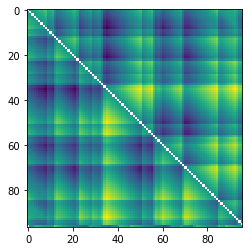

In [88]:
plt.imshow(hic.safe_log(hic.normalize_distance(insulation_model.generate_interactions_matrix(*f))))

In [249]:
log_ck = f[:-1]
alpha = f[-1]

In [250]:
logP = insulation_model.log_distance_decay(log_ck.size+2, alpha) + insulation_model.get_lower_triangle(insulation_model.log_insulation_probability(log_ck).T)
logZ = scipy.special.logsumexp(logP)
P = gc_model.triangle_to_symmetric(log_ck.size+1, np.exp(logP - logZ))

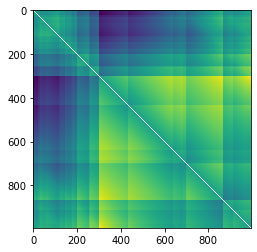

In [243]:
plt.imshow(np.log(hic.normalize_distance(P)))

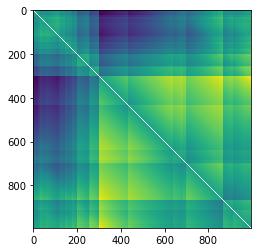

In [251]:
plt.imshow(np.log(hic.normalize_distance(P)))

/Users/hkariti/anaconda3/envs/kaplanlab/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


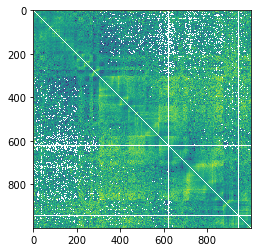

In [246]:
plt.imshow(np.log(hic.normalize_distance(input_data[:1000, :1000]/np.nansum(input_data[:1000, :1000]))))

In [268]:
m = np.where(hic.get_usable_bins_mask(input_data))[0]
input_data[m, :][:, m]

array([[0.04516402, 0.04155528, 0.02533859, ..., 0.00060191, 0.00056845,
        0.00058244],
       [0.04155528, 0.04904161, 0.04595661, ..., 0.00080955, 0.00058006,
        0.0007541 ],
       [0.02533859, 0.04595661, 0.0465255 , ..., 0.00050129, 0.00054228,
        0.00063361],
       ...,
       [0.00060191, 0.00080955, 0.00050129, ..., 0.04976335, 0.05372455,
        0.02505964],
       [0.00056845, 0.00058006, 0.00054228, ..., 0.05372455, 0.05407835,
        0.05729461],
       [0.00058244, 0.0007541 , 0.00063361, ..., 0.02505964, 0.05729461,
        0.06447513]])

In [279]:
@curry
def a(a1, a2, a3):
    print(a1, a2, a3)

In [292]:
a = np.eye(5)
b = np.array([True, True, False, False, False, False, True, True, True])
s = list(a.shape)
s[0] = b.size

In [296]:
m = np.full(s, np.nan)

In [311]:
import distance_decay_model

In [314]:
%timeit distance_decay_model.log_distance_vector(1000, np.ones(1000, dtype=bool))

28.7 ms ± 1.47 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [322]:
%timeit distance_decay_model.log_distance_vector(1000, np.ones(1000, dtype=bool))

21 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


(98,)

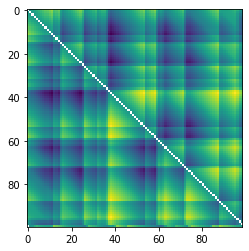

In [116]:
f = insulation_model.fit(input_data[:100, :100])
i1 = plt.imshow(np.log(hic.normalize_distance(insulation_model.generate_interactions_matrix(*f))))
f[0].shape

(96,)

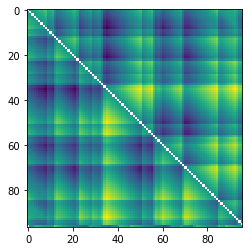

In [117]:
#f2 = insulation_model.fit(input_data[:100, :100])
plt.imshow(hic.safe_log(hic.normalize_distance(insulation_model.generate_interactions_matrix(f2[:-1], f2[-1]))))
f2.shape

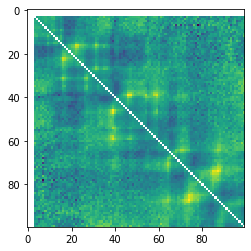

In [118]:
plt.imshow(hic.safe_log(hic.normalize_distance(input_data[:100, :100])))

In [115]:
b[0] = 4
b, a

(array([4., 1., 0.]), array([4., 1., 0.]))